In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="urllib3")

import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ticker = 'AAPL'
# data = yf.download(ticker, start='2016-01-01', end='2025-01-01')

# Список тикеров
tickers = ['AAPL', 'NVDA', 'TSLA', 'MSFT', 'AMZN', 'META', 'NFLX']

data = yf.download(tickers, start='2018-01-01', end='2025-01-01', group_by='ticker')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed


In [3]:
data.head()

Ticker           TSLA                                                    META  \
Price            Open       High        Low      Close     Volume        Open   
Date                                                                            
2018-01-02  20.799999  21.474001  20.733334  21.368668   65283000  176.846523   
2018-01-03  21.400000  21.683332  21.036667  21.150000   67822500  181.026821   
2018-01-04  20.858000  21.236668  20.378668  20.974667  149194500  184.032635   
2018-01-05  21.108000  21.149332  20.799999  21.105333   68868000  184.719412   
2018-01-08  21.066668  22.468000  21.033333  22.427334  147891000  186.321869   

Ticker                                                    ...       AAPL  \
Price             High         Low       Close    Volume  ...       Open   
Date                                                      ...              
2018-01-02  180.728238  176.717143  180.568985  18151900  ...  39.986353   
2018-01-03  183.913211  180.479398  183.803726  16886600  ...  40.543284   
2018-01-04  185.336503  183.236400  183.465317  13880900  ...  40.545630   
2018-01-05  186.023264  184.062504  185.973511  13574500  ...  40.757119   
2018-01-08  188.013892  185.455955  187.396805  17994700  ...  40.970985   

Ticker                                                       MSFT             \
Price            High        Low      Close     Volume       Open       High   
Date                                                                           
2018-01-02  40.489237  39.774858  40.479836  102223600  79.640605  79.807044   
2018-01-03  41.017971  40.409341  40.472786  118071600  79.575881  79.991981   
2018-01-04  40.764175  40.437536  40.660778   89738400  80.065920  81.055309   
2018-01-05  41.210653  40.665472  41.123707   94640000  81.055344  81.748836   
2018-01-08  41.267075  40.872285  40.970985   82271200  81.554657  81.906031   

Ticker                                      
Price             Low      Close    Volume  
Date                                        
2018-01-02  79.058075  79.474167  22483800  
2018-01-03  79.492666  79.844032  26061400  
2018-01-04  80.047430  80.546745  21912000  
2018-01-05  80.842670  81.545410  23407100  
2018-01-08  80.999865  81.628632  22113000  

[5 rows x 35 columns]

In [4]:
#Дневная доходность
for ticker in tickers:
    data[(ticker, 'Daily Return')] = data[(ticker, 'Close')].pct_change()

In [5]:
data.head()

Ticker           TSLA                                                    META  \
Price            Open       High        Low      Close     Volume        Open   
Date                                                                            
2018-01-02  20.799999  21.474001  20.733334  21.368668   65283000  176.846523   
2018-01-03  21.400000  21.683332  21.036667  21.150000   67822500  181.026821   
2018-01-04  20.858000  21.236668  20.378668  20.974667  149194500  184.032635   
2018-01-05  21.108000  21.149332  20.799999  21.105333   68868000  184.719412   
2018-01-08  21.066668  22.468000  21.033333  22.427334  147891000  186.321869   

Ticker                                                    ...       MSFT  \
Price             High         Low       Close    Volume  ...        Low   
Date                                                      ...              
2018-01-02  180.728238  176.717143  180.568985  18151900  ...  79.058075   
2018-01-03  183.913211  180.479398  183.803726  16886600  ...  79.492666   
2018-01-04  185.336503  183.236400  183.465317  13880900  ...  80.047430   
2018-01-05  186.023264  184.062504  185.973511  13574500  ...  80.842670   
2018-01-08  188.013892  185.455955  187.396805  17994700  ...  80.999865   

Ticker                                  AAPL         NVDA         TSLA  \
Price           Close    Volume Daily Return Daily Return Daily Return   
Date                                                                     
2018-01-02  79.474167  22483800          NaN          NaN          NaN   
2018-01-03  79.844032  26061400    -0.000174     0.065814    -0.010233   
2018-01-04  80.546745  21912000     0.004645     0.005271    -0.008290   
2018-01-05  81.545410  23407100     0.011385     0.008474     0.006230   
2018-01-08  81.628632  22113000    -0.003714     0.030641     0.062638   

Ticker             MSFT         AMZN         META         NFLX  
Price      Daily Return Daily Return Daily Return Daily Return  
Date                                                            
2018-01-02          NaN          NaN          NaN          NaN  
2018-01-03     0.004654     0.012775     0.017914     0.019794  
2018-01-04     0.008801     0.004476    -0.001841     0.002829  
2018-01-05     0.012399     0.016163     0.013671     0.021203  
2018-01-08     0.001021     0.014425     0.007653     0.009810  

[5 rows x 42 columns]

In [6]:
#Удалим пустые значения
data.dropna(inplace=True)

In [7]:
for ticker in tickers:
    volatility = data[(ticker, 'Daily Return')].std()
    print(f"Волатильность {ticker}: {volatility:.4f}")

Волатильность AAPL: 0.0192
Волатильность NVDA: 0.0325
Волатильность TSLA: 0.0401
Волатильность MSFT: 0.0182
Волатильность AMZN: 0.0217
Волатильность META: 0.0264
Волатильность NFLX: 0.0279


In [8]:
# Расчет VaR параметрическим методом (предполагаем нормальное распределение)
confidence_level = 0.95

for ticker in tickers:
    mean_return = data[(ticker, 'Daily Return')].mean()
    std_return = data[(ticker, 'Daily Return')].std()
    VaR_param = -stats.norm.ppf(1 - confidence_level, mean_return, std_return)
    
    print(f"VaR для {ticker} (параметрический метод, 95% доверительный интервал): {VaR_param:.4f}")

VaR для AAPL (параметрический метод, 95% доверительный интервал): 0.0304
VaR для NVDA (параметрический метод, 95% доверительный интервал): 0.0510
VaR для TSLA (параметрический метод, 95% доверительный интервал): 0.0635
VaR для MSFT (параметрический метод, 95% доверительный интервал): 0.0288
VaR для AMZN (параметрический метод, 95% доверительный интервал): 0.0347
VaR для META (параметрический метод, 95% доверительный интервал): 0.0424
VaR для NFLX (параметрический метод, 95% доверительный интервал): 0.0446


In [9]:
# Рассчитываем VaR непараметрическим методом для каждого тикера
for ticker in tickers:
    # Берем процентиль доходности
    VaR_non_param = -np.percentile(data[(ticker, 'Daily Return')], 100 * (1 - confidence_level))
    print(f"VaR для {ticker} (непараметрический метод, 95% доверительный интервал): {VaR_non_param:.4f}")

VaR для AAPL (непараметрический метод, 95% доверительный интервал): 0.0295
VaR для NVDA (непараметрический метод, 95% доверительный интервал): 0.0472
VaR для TSLA (непараметрический метод, 95% доверительный интервал): 0.0586
VaR для MSFT (непараметрический метод, 95% доверительный интервал): 0.0285
VaR для AMZN (непараметрический метод, 95% доверительный интервал): 0.0329
VaR для META (непараметрический метод, 95% доверительный интервал): 0.0378
VaR для NFLX (непараметрический метод, 95% доверительный интервал): 0.0390


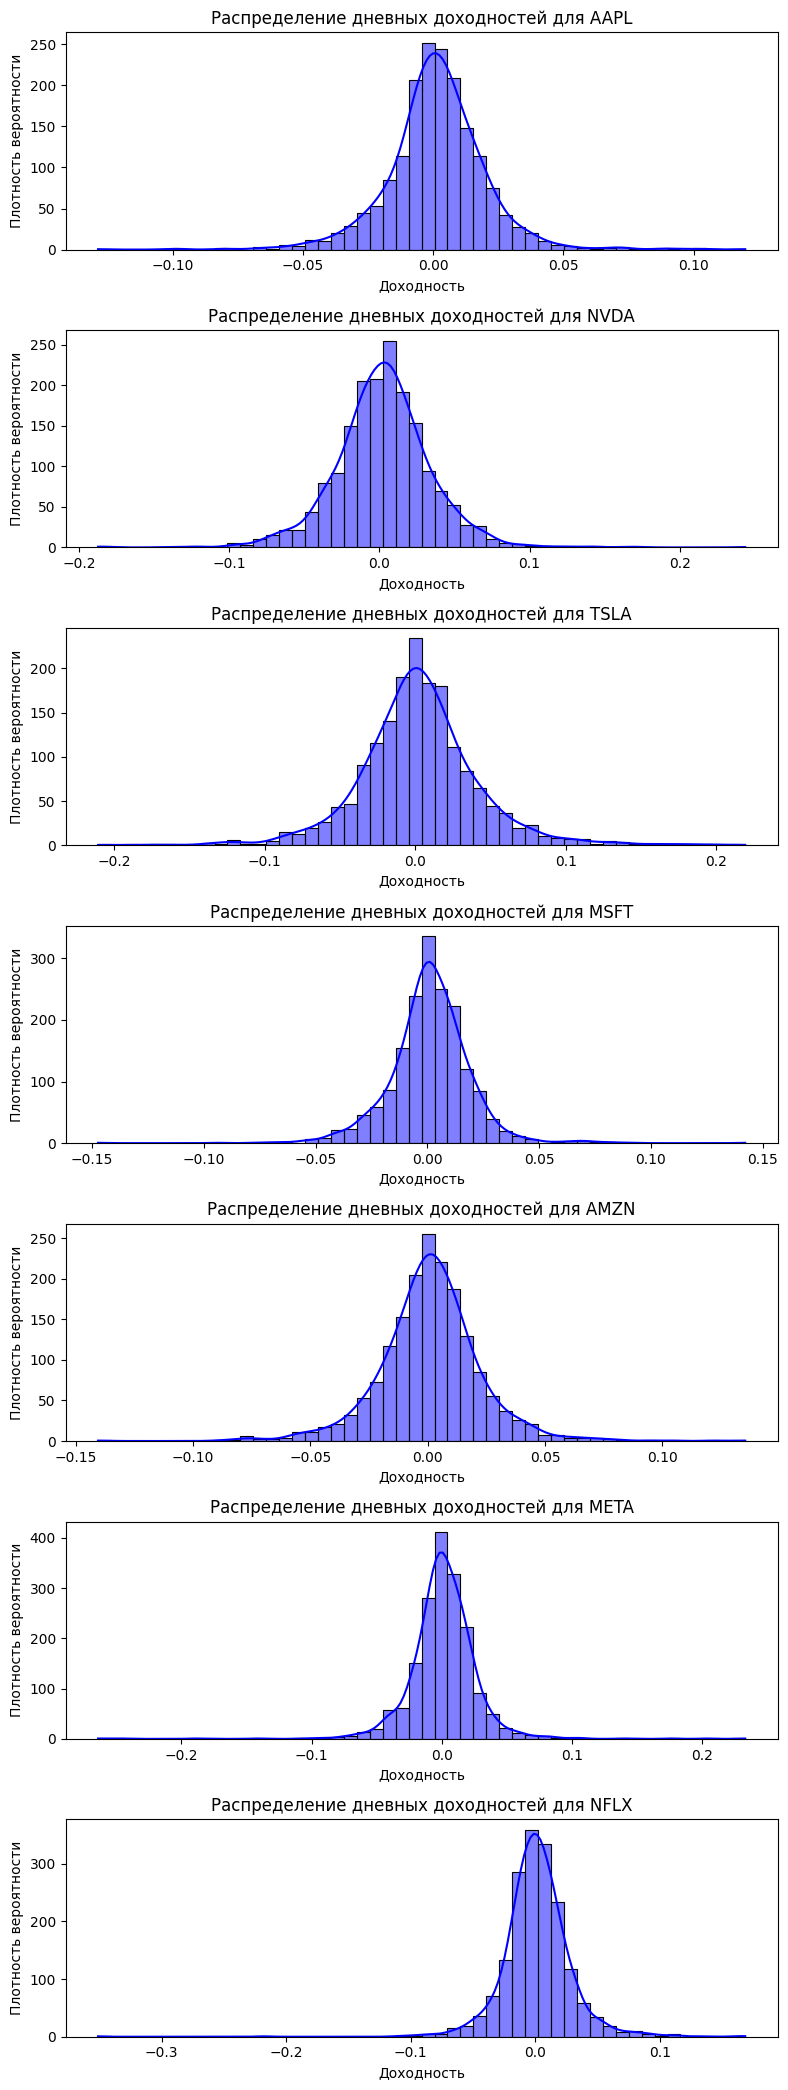

In [10]:

# Создаем сетку подграфиков
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(8, 3 * len(tickers)))

# Перебираем тикеры и строим гистограммы с KDE
for i, ticker in enumerate(tickers):
    sns.histplot(data[(ticker, 'Daily Return')], bins=50, kde=True, color='b', ax=axes[i])
    axes[i].set_title(f'Распределение дневных доходностей для {ticker}')
    axes[i].set_xlabel('Доходность')
    axes[i].set_ylabel('Плотность вероятности')

plt.tight_layout()

plt.show()

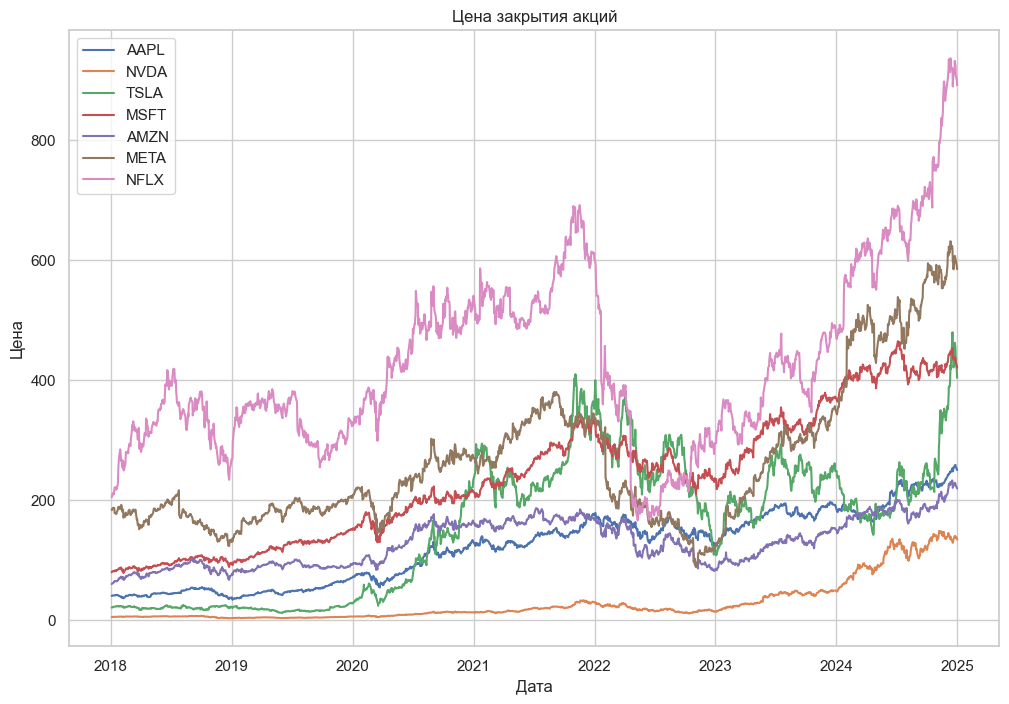

In [11]:

# Настройка стиля seaborn
sns.set(style="whitegrid")

# Создаем график
plt.figure(figsize=(12, 8))

# Перебираем тикеры и строим графики цен закрытия
for ticker in tickers:
    sns.lineplot(data=data[(ticker, 'Close')], label=ticker)


plt.title('Цена закрытия акций')
plt.xlabel('Дата')
plt.ylabel('Цена')

plt.legend()

plt.show()